In [ ]:
!pip install matplot

C:\Users\tjddl\AppData\Local\Temp\ipykernel_39148\862415449.py:21: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\tjddl\AppData\Local\Temp\ipykernel_39148\862415449.py:21: UserWarning: Glyph 49696 (\N{HANGUL SYLLABLE SUL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\tjddl\AppData\Local\Temp\ipykernel_39148\862415449.py:21: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\tjddl\AppData\Local\Temp\ipykernel_39148\862415449.py:21: UserWarning: Glyph 53076 (\N{HANGUL SYLLABLE KO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\tjddl\AppData\Local\Temp\ipykernel_39148\862415449.py:21: UserWarning: Glyph 46300 (\N{HANGUL SYLLABLE DEU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\tjddl\AppData\Local\Temp\ipykernel_39148\862415449.py:21: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) 

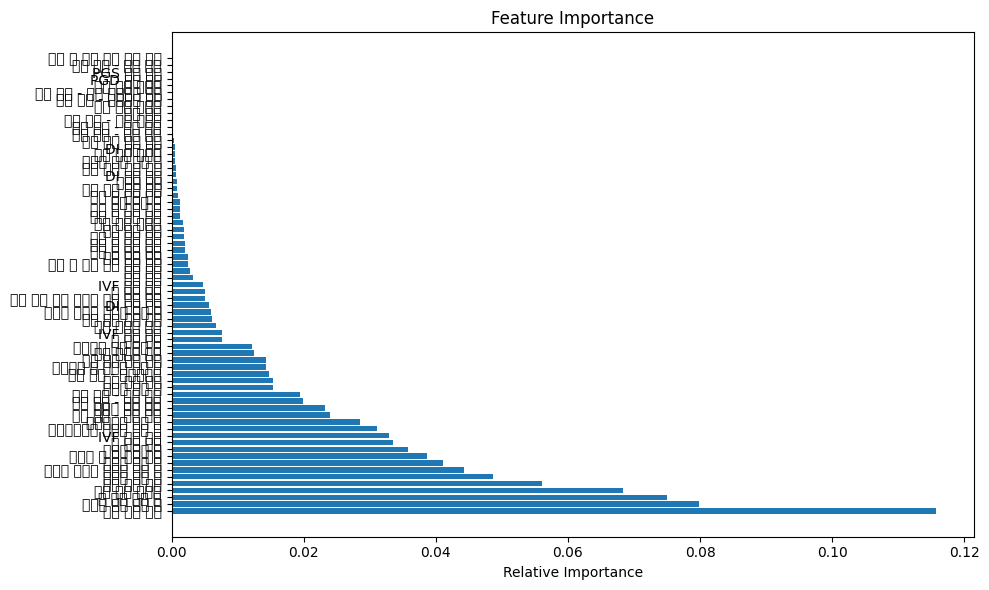

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from category_encoders import TargetEncoder

# 데이터 불러오기
train = pd.read_csv('train.csv').drop(columns=['ID'])
X = train.drop('임신 성공 여부', axis=1)
y = train['임신 성공 여부']

# 훈련 데이터와 검증 데이터로 나누기
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# 카테고리형 변수 인코딩 (Target Encoding)
categorical_columns = X.select_dtypes(include=['object']).columns  # 문자형 열 추출
encoder = TargetEncoder(cols=categorical_columns)
X_train_encoded = encoder.fit_transform(X_train, y_train)
X_val_encoded = encoder.transform(X_val)

# 랜덤 포레스트 모델 학습
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_encoded, y_train)

# 특성 중요도 출력
importances = rf.feature_importances_

# 중요도를 기준으로 특성 정렬
indices = np.argsort(importances)[::-1]

# 그래프 출력
plt.figure(figsize=(10,6))
plt.title("Feature Importance")
plt.barh(range(X_train_encoded.shape[1]), importances[indices], align="center")
plt.yticks(range(X_train_encoded.shape[1]), X_train_encoded.columns[indices])
plt.xlabel("Relative Importance")
plt.show()


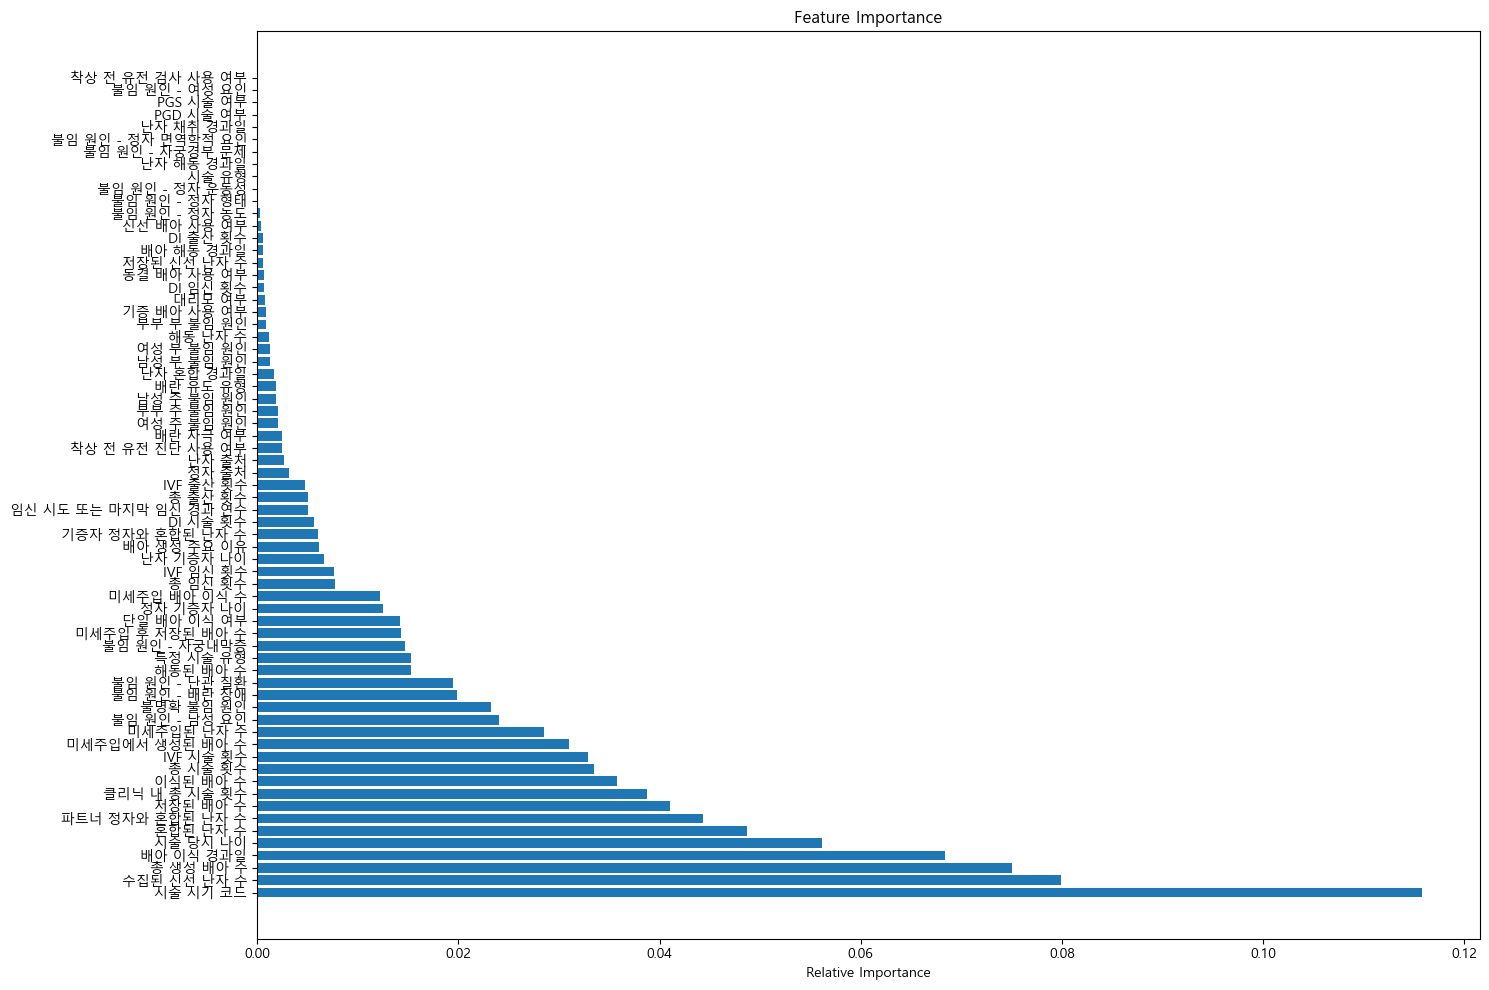

In [12]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import font_manager

# 한글 폰트 설정 (예: 맑은 고딕)
plt.rcParams['font.family'] = 'Malgun Gothic'

# 특성 중요도 출력
importances = rf.feature_importances_

# 중요도를 기준으로 특성 정렬
indices = np.argsort(importances)[::-1]

# 그래프 출력
plt.figure(figsize=(15,10))
plt.title("Feature Importance")
plt.barh(range(X_train_encoded.shape[1]), importances[indices], align="center")
plt.yticks(range(X_train_encoded.shape[1]), X_train_encoded.columns[indices])
plt.xlabel("Relative Importance")

# y축 레이블 회전
plt.yticks(rotation=0)

# 레이아웃 자동 조정
plt.tight_layout()

plt.show()


In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

# 1. 데이터 로드
train = pd.read_csv('train.csv').drop(columns=['ID'])
test = pd.read_csv('test.csv').drop(columns=['ID'])

# 2. 독립 변수(X)와 종속 변수(y) 분리
X = train.drop('임신 성공 여부', axis=1)
y = train['임신 성공 여부']

# 3. LabelEncoder를 훈련 데이터에 맞춰 학습
label_encoder = LabelEncoder()

# 4. 훈련 데이터와 테스트 데이터에 대해 Label Encoding 적용
def safe_transform(encoder, column_data):
    # 'Unknown' 처리: 존재하지 않는 범주를 'Unknown'으로 대체
    return encoder.fit_transform(column_data.fillna('Unknown'))

# 5. 모든 특성에 대해 Label Encoding 적용
for column in X.select_dtypes(include='object').columns:
    X[column] = label_encoder.fit_transform(X[column].fillna('Unknown'))  # 'Unknown' 처리
    test[column] = label_encoder.fit_transform(test[column].fillna('Unknown'))  # 테스트 데이터에도 'Unknown' 처리

# 6. 데이터 분할 (훈련/검증 데이터셋)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# 7. 랜덤 포레스트 모델 학습
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# 8. 모델 예측 (확률 예측)
y_pred_prob = rf.predict_proba(X_val)[:, 1]

# 9. ROC AUC 계산
roc_auc = roc_auc_score(y_val, y_pred_prob)
print(f"모델 ROC AUC 점수: {roc_auc:.4f}")

# 10. 중요 특성 출력
importances = rf.feature_importances_

# 특성 중요도와 함께 DataFrame으로 변환
features_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})
features_importance_df = features_importance_df.sort_values(by='Importance', ascending=False)

# 상위 10개의 특성 출력
print("\n상위 10개 특성:")
print(features_importance_df.head(5))

# 11. 상위 특성만 사용하여 모델 재학습 (필요시)
top_features = features_importance_df.head(5)['Feature'].tolist()
X_train_selected = X_train[top_features]
X_val_selected = X_val[top_features]

# 모델 재학습
rf_selected = RandomForestClassifier(n_estimators=100, random_state=42)
rf_selected.fit(X_train_selected, y_train)

# 검증 데이터 예측
y_pred_selected_prob = rf_selected.predict_proba(X_val_selected)[:, 1]

# ROC AUC 계산 (상위 특성만 사용)
roc_auc_selected = roc_auc_score(y_val, y_pred_selected_prob)
print(f"모델 ROC AUC 점수 (상위 특성만 사용): {roc_auc_selected:.4f}")

# 12. 테스트 데이터 예측
test_predictions = rf_selected.predict(test[top_features])

# # 13. 예측 결과 저장
# submission = pd.DataFrame({'ID': pd.read_csv('test.csv')['ID'], '임신 성공 여부': test_predictions})
# submission.to_csv('submission.csv', index=False)

# print("\n최종 결과가 'submission.csv'에 저장되었습니다.")


모델 ROC AUC 점수: 0.7027

상위 10개 특성:
        Feature  Importance
0      시술 시기 코드    0.114448
47  수집된 신선 난자 수    0.081448
38    총 생성 배아 수    0.075032
65    배아 이식 경과일    0.068558
1      시술 당시 나이    0.056584
모델 ROC AUC 점수 (상위 특성만 사용): 0.6842
